In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

Sonderzeichen gefunden in Spalte C-J59-0: 0 Zeilen
Sonderzeichen gefunden in Spalte F-ISIS-1: 0 Zeilen
Sonderzeichen gefunden in Spalte C-A10-0: 0 Zeilen
Sonderzeichen gefunden in Spalte Datum: 0 Zeilen
Sonderzeichen gefunden in Spalte Date: 72 Zeilen
Sonderzeichen gefunden in Spalte car-model-name: 21380 Zeilen


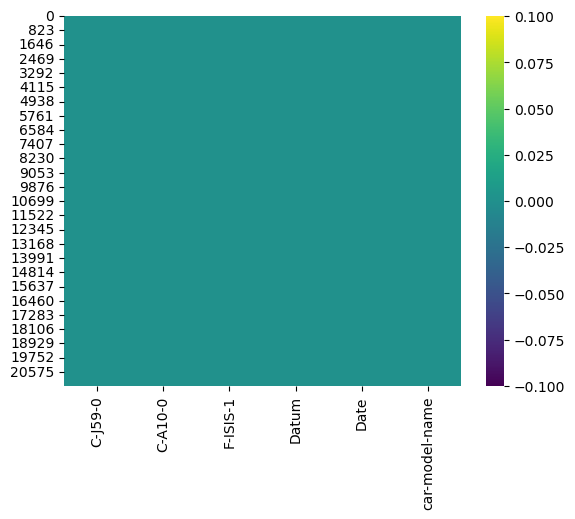

In [100]:
df_nmb_of_registrations = pd.read_csv('Data/OGD_fkfzul0759_OD_PkwNZL_1.csv', sep=';')
df_nmb_of_registrations.drop('C-EK7-0', axis=1, inplace=True)

df_monthly_values = pd.read_csv('Data/OGD_fkfzul0759_OD_PkwNZL_1_C-A10-0.csv', sep=';')
df_monthly_values.rename(columns={'name': 'Datum', 'en_name': 'Date'}, inplace=True)
df_monthly_values = df_monthly_values[['code', 'Datum', 'Date']]

df_car_name = pd.read_csv('Data/OGD_fkfzul0759_OD_PkwNZL_1_C-J59-0.csv', sep=';')
df_car_name.rename(columns={'en_name': 'car-model-name'}, inplace=True)
df_car_name = df_car_name[['code', 'car-model-name']]

# Mergen der Datensätze
merged_data = pd.merge(df_nmb_of_registrations, df_monthly_values, left_on='C-A10-0', right_on='code', how='left')
merged_data = pd.merge(merged_data, df_car_name, left_on='C-J59-0', right_on='code', how='left')

merged_data.drop(['code_x', 'code_y'], axis=1, inplace=True)

# Entfernen von Sonderzeichen
special_char_pattern = r'[^a-zA-Z0-9äöüÄÖÜß\s-]'
columns_to_check = ['C-J59-0','F-ISIS-1', 'C-A10-0', 'Datum', 'Date', 'car-model-name']

for column in columns_to_check:
    merged_data[column] = merged_data[column].astype(str)
    special_char_rows = merged_data[merged_data[column].str.contains(special_char_pattern, regex=True, na=False)]
    count_special_chars = special_char_rows.shape[0]
    merged_data[column] = merged_data[column].str.replace(special_char_pattern, '', regex=True)
    print(f"Sonderzeichen gefunden in Spalte {column}: {count_special_chars} Zeilen")


merged_data['car-model-name'] = merged_data['car-model-name'].str.replace(r'<.*?>|\d+', '', regex=True)
merged_data['car-model-name'] = merged_data['car-model-name'].str.strip()

sns.heatmap(merged_data.isnull(), cmap='viridis')

merged_data.to_csv('export/Car_registrations_by_name_and_date.csv', index=False)
